<a href="https://colab.research.google.com/github/Chirag-Juneja/ML-Workbooks/blob/main/Deep%20Learning/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent

## Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


## Create Noisy Data

In [2]:
def create_noisy_data(m=0.5,b=0.7,n=100):
    x = tf.random.uniform(shape=(n,))
    noise  = tf.random.normal(shape=(len(x),),stddev=0.05)
    y = m * x + b + noise
    return x,y

x_train, y_train = create_noisy_data()

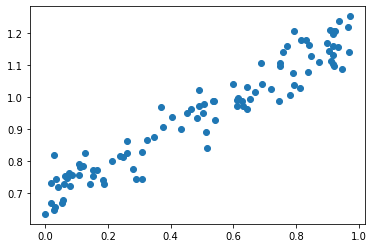

In [3]:
plt.scatter(x_train,y_train)

## Create Linear Regression Model

In [4]:
class LinearRegression:

    def __init__(self, learning_rate = 0.05, steps=400):
        self.learning_rate = learning_rate
        self.steps = steps
        self.m = tf.Variable(10.)
        self.b = tf.Variable(7.)
        self.history = []

    def predict(self, x):
        y = self.m * x + self.b
        return y

    def squared_error(self, y_pred, y_true):
        return tf.reduce_mean(tf.square(y_pred - y_true))

    def train(self, x_train, y_train):
        for i in range(self.steps):
            with tf.GradientTape() as tape:
                predictions = self.predict(x_train)
                self.loss = self.squared_error(predictions,y_train)

            gradients = tape.gradient(self.loss,[self.m,self.b])
            
            self.history.append((
                self.m.numpy(),
                self.b.numpy(),
                self.loss.numpy()
            ))

            self.m.assign_sub(gradients[0] * self.learning_rate)
            self.b.assign_sub(gradients[1] * self.learning_rate)

            if i%20 == 0:
                print("Step %d, Loss %f"%(i,self.loss.numpy()))
                            

## Train the Model

In [5]:
model = LinearRegression(learning_rate = 0.05, steps = 800)
model.train(x_train, y_train)

Step 0, Loss 131.269440
Step 20, Loss 2.210131
Step 40, Loss 1.198883
Step 60, Loss 0.867909
Step 80, Loss 0.629742
Step 100, Loss 0.457108
Step 120, Loss 0.331972
Step 140, Loss 0.241263
Step 160, Loss 0.175511
Step 180, Loss 0.127849
Step 200, Loss 0.093301
Step 220, Loss 0.068257
Step 240, Loss 0.050104
Step 260, Loss 0.036945
Step 280, Loss 0.027407
Step 300, Loss 0.020492
Step 320, Loss 0.015481
Step 340, Loss 0.011848
Step 360, Loss 0.009214
Step 380, Loss 0.007305
Step 400, Loss 0.005922
Step 420, Loss 0.004919
Step 440, Loss 0.004191
Step 460, Loss 0.003664
Step 480, Loss 0.003282
Step 500, Loss 0.003005
Step 520, Loss 0.002805
Step 540, Loss 0.002659
Step 560, Loss 0.002554
Step 580, Loss 0.002477
Step 600, Loss 0.002422
Step 620, Loss 0.002382
Step 640, Loss 0.002353
Step 660, Loss 0.002331
Step 680, Loss 0.002316
Step 700, Loss 0.002305
Step 720, Loss 0.002297
Step 740, Loss 0.002291
Step 760, Loss 0.002287
Step 780, Loss 0.002284


## Plot Prediction

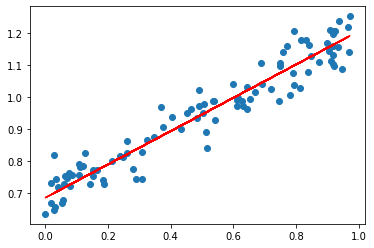

In [6]:
plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict(x_train), color='r')

## Plot Gradient Decent

Text(0.5, 0, 'loss')

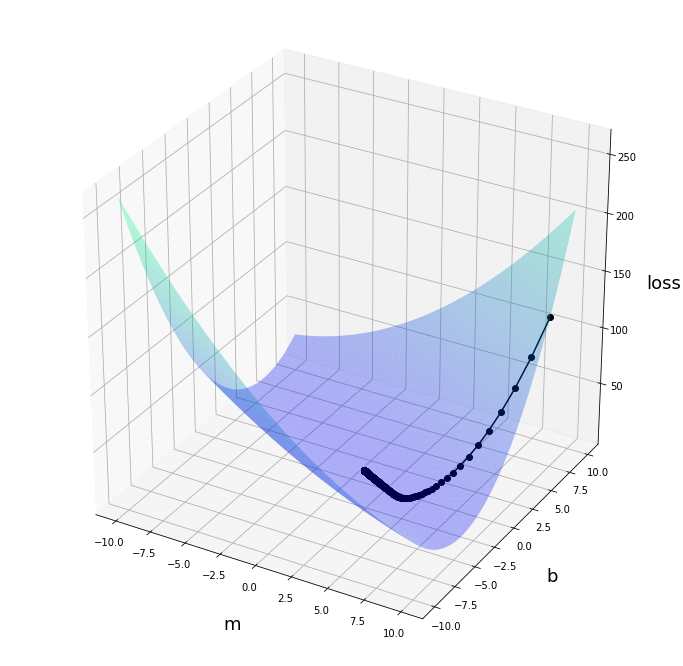

In [7]:
from mpl_toolkits.mplot3d import Axes3D

def loss_for_values(m, b):
    y = m * x_train + b
    loss = model.squared_error(y, y_train)
    return loss

ms = np.linspace(-10,10)
bs = np.linspace(-10,10)
m_mesh, b_mesh = np.meshgrid(ms,bs)

zs = np.array([loss_for_values(m, b) for (m, b) in zip(np.ravel(m_mesh),np.ravel(b_mesh))])
z_mesh = zs.reshape(m_mesh.shape)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection='3d')

ax.plot_surface(
    m_mesh,
    b_mesh,
    z_mesh,
    cmap = 'winter',
    alpha=0.3
)

ax.plot(
    [h[0] for h in model.history],
    [h[1] for h in model.history],
    [h[2] for h in model.history],
    marker = 'o',
    color = 'black'
)

ax.view_init(elev=30,azim=300)

ax.set_xlabel('m',fontsize=18,labelpad = 20)
ax.set_ylabel('b',fontsize=18,labelpad = 20)
ax.set_zlabel('loss',fontsize=18,labelpad = 20)